### Intall the necessary packages

In [1]:
%pip install --break-system-packages -r ./requirements.txt
!python -m pip install --upgrade pip
!apt-get update
!apt-get install  libgl1
!python3 -m spacy download en_core_web_sm --break-system-packages



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cffi-1.17.1-cp313-cp313-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------------------------------- ------ 8.1/9.6 MB 49.6 MB/s


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1


'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Apps > Advanced app settings > App execution aliases.


In [ ]:
# Install necessary libraries (if not already installed)
%pip install --break-system-packages numpy matplotlib pillow scikit-image opencv-python

# Noise Removal Example

### Load Basic Packages

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Gaussian Noise

In [25]:
noise_image = cv2.imread('data/noises/gaussian/10961455225_0786d3edd2_c.jpg')
orig_image = cv2.imread('data/original/10961455225_0786d3edd2_c.jpg')


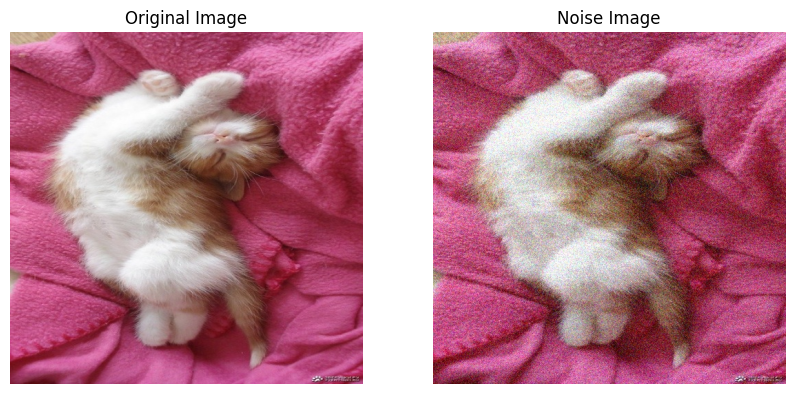

In [26]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.title('Noise Image')
plt.axis('off')

plt.show()

### **Gaussian Blur: Mathematics and Implementation**

A Gaussian blur is a widely used image processing technique that smooths an image by applying a Gaussian function as a kernel. The Gaussian function assigns weights to neighboring pixels, with weights decreasing as the distance from the center increases.

---

#### **1. Gaussian Function**

The 2D Gaussian function is defined as:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

- $ x, y $: Coordinates relative to the center of the kernel.
- $ \sigma $: Standard deviation of the Gaussian distribution, controlling the amount of blurring.

---

#### **2. Gaussian Kernel**

The Gaussian kernel is a matrix of weights derived from the Gaussian function. For a kernel of size $ (2k+1) \times (2k+1) $, the weights are computed as:

$$
K_{i,j} = \frac{1}{2\pi\sigma^2} e^{-\frac{(i-k)^2 + (j-k)^2}{2\sigma^2}}
$$

- $ i, j $: Indices of the kernel.
- $ k $: Half the kernel size (e.g., for a 5x5 kernel, $ k = 2 $).

Example: A 3x3 kernel with $ \sigma = 1 $:
$$
K = \frac{1}{2\pi} \begin{bmatrix}
e^{-\frac{2}{2}} & e^{-\frac{1}{2}} & e^{-\frac{2}{2}} \\
e^{-\frac{1}{2}} & e^{0} & e^{-\frac{1}{2}} \\
e^{-\frac{2}{2}} & e^{-\frac{1}{2}} & e^{-\frac{2}{2}}
\end{bmatrix}
$$

---

#### **3. Normalization**

The kernel is normalized so that the sum of all weights equals 1:

$$
\sum_{i=-k}^{k} \sum_{j=-k}^{k} K_{i,j} = 1
$$

This ensures that the brightness of the image is preserved after blurring.

---

#### **4. Convolution with the Kernel**

The Gaussian blur is applied via **convolution**. For each pixel in the image, the weighted sum of its neighbors is computed:

$$
\text{Blurred Pixel} = \sum_{i=-k}^{k} \sum_{j=-k}^{k} \text{Image}_{x+i, y+j} \cdot K_{i,j}
$$

- $ \text{Image}_{x+i, y+j} $: Pixel value at position $ (x+i, y+j) $.
- $ K_{i,j} $: Weight from the Gaussian kernel.

---

#### **5. Efficient Implementation**

- **Truncation**: The kernel is typically truncated to a finite size (e.g., $ 5 \times 5 $ or $ 7 \times 7 $) based on $ \sigma $.
- **Optimization**: Gaussian blurring is often applied as two 1D convolutions (horizontal and vertical) for computational efficiency.

---

# Gaussian Blurring from Scratch

In [27]:
import numpy as np
from PIL import Image

def gaussian_kernel(size, sigma):
    """
    Generate a 2D Gaussian kernel.
    """
    k = size // 2
    x, y = np.linspace(-k, k, size), np.linspace(-k, k, size)
    X, Y = np.meshgrid(x, y)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)  # Normalize

def convolve(image, kernel):
    """
    Apply a 2D convolution to a single image channel.
    """
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.sum(window * kernel)

    return result

def apply_gaussian_blur(input_path, output_path, kernel_size=5, sigma=1):
    """
    Apply Gaussian blur to an RGB image.
    """
    # Load image
    image = Image.open(input_path)
    image_array = np.array(image)

    # Split into channels
    r = image_array[:, :, 0]
    g = image_array[:, :, 1]
    b = image_array[:, :, 2]

    # Generate kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply convolution to each channel
    blurred_r = convolve(r, kernel)
    blurred_g = convolve(g, kernel)
    blurred_b = convolve(b, kernel)

    # Recombine channels
    blurred_image = np.stack([blurred_r, blurred_g, blurred_b], axis=2)
    blurred_image = np.clip(blurred_image, 0, 255).astype(np.uint8)

    # Save output
    Image.fromarray(blurred_image).save(output_path)
    print(f"Blurred image saved to: {output_path}")

In [28]:
apply_gaussian_blur('data/noises/gaussian/10961455225_0786d3edd2_c.jpg', 'scratch/output.jpg', kernel_size=5, sigma=1)

Blurred image saved to: scratch/output.jpg


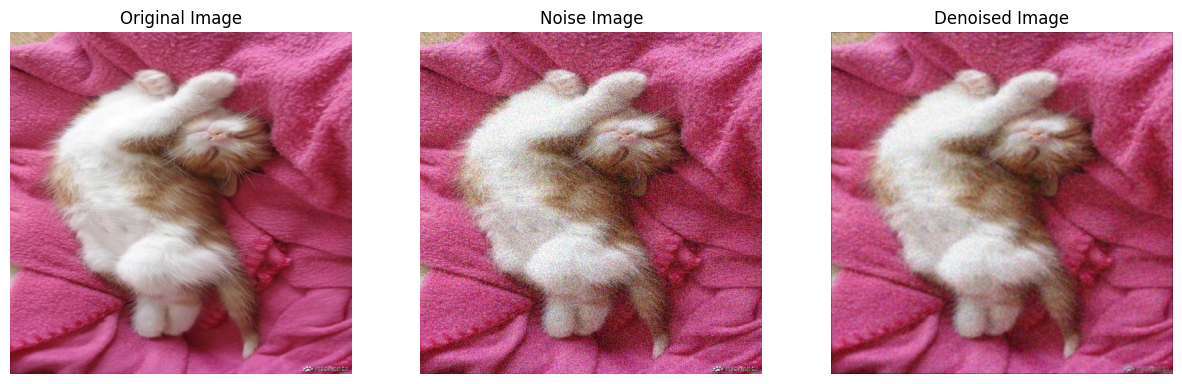

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.title('Noise Image')
plt.axis('off')

plt.subplot(1, 3, 3)
result_image = cv2.imread('scratch/output.jpg')
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')
plt.axis('off')

plt.show()

# As Alwyas Better Filters

Common arguments are cv2.fastNlMeansDenoisingColored

+ h : parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok)
+ hForColorComponents : same as h, but for color images only. (normally same as h)
+ templateWindowSize : should be odd. (recommended 7)
+ searchWindowSize : should be odd. (recommended 21)

### **Mean Denoising Filter: Mathematics and Implementation**

A **mean filter** is a basic spatial filter used to reduce **salt-and-pepper noise** or **random noise** in images. It replaces each pixel value with the **average of its neighboring pixels** in a predefined window (kernel). This is a **linear, non-adaptive** filter.

---

#### **1. Kernel Definition**

The kernel is a **square matrix** of size $ (2k+1) \times (2k+1) $, where all the elements are equal to:

$$
K_{i,j} = \frac{1}{(2k+1)^2}
$$

- $ k $: Half the kernel size (e.g., for a 3×3 kernel, $ k = 1 $).
- $ (2k+1)^2 $: Total number of elements in the kernel (used for normalization).

Example: A **3×3 kernel**:

$$
K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

---

#### **2. Convolution Operation**

The filter is applied to the image using **2D convolution**. For each pixel $ (x, y) $ in the image, the new value is computed as:

$$
\text{Filtered Pixel} = \sum_{i=-k}^{k} \sum_{j=-k}^{k} \text{Image}_{x+i, y+j} \cdot K_{i,j}
$$

- $ \text{Image}_{x+i, y+j} $: Pixel value at position $ (x+i, y+j) $.
- $ K_{i,j} $: Weight from the kernel (equal to $ \frac{1}{(2k+1)^2} $).

Since all weights are equal, this simplifies to:

$$
\text{Filtered Pixel} = \frac{1}{(2k+1)^2} \sum_{i=-k}^{k} \sum_{j=-k}^{k} \text{Image}_{x+i, y+j}
$$

This is the **average of all pixels in the neighborhood**.

---

#### **3. Normalization**

The kernel is **automatically normalized** because the sum of all elements in the kernel is:

$$
\sum_{i=-k}^{k} \sum_{j=-k}^{k} K_{i,j} = 1
$$

This ensures that the **brightness** of the image is **preserved** (no overall gain or loss of intensity).

---

#### **4. Fast Implementation**

The mean filter is **computationally efficient** because:

- It uses a **uniform kernel** (no need for complex weight calculations).
- It can be implemented with **vectorized operations** (e.g., using NumPy or OpenCV).
- It is **local** and does not require complex parameter tuning.

---

#### **5. Limitations**

- **Blurs edges**: Averaging can **smear edges** and **lose fine details**.
- **Not effective for structured noise**: Better filters (like **median filter** or **Gaussian filter**) may be needed for more complex noise patterns.
- **Sensitivity to kernel size**: Larger kernels reduce noise more but increase blurring.

In [ ]:
denoised_img = cv2.fastNlMeansDenoisingColored(noise_image, None, 7, 7, 7, 21)

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')
plt.axis('off')

plt.show()

# Salt and Peeper Noise

+ Opening is the combination of erosion followed by dilation .
It is particularly useful for removing small noise particles (e.g., salt-and-pepper noise) from a binary image.
The structuring element (kernel) determines the size and shape of the features being removed.

In [ ]:
noise_image = cv2.imread('data/noises/salt_and_pepper/127215712_ff5b654d07_c.jpg')
orig_image = cv2.imread('data/original/127215712_ff5b654d07_c.jpg')

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.title('Noise Image')
plt.axis('off')

plt.show()

In [ ]:


# Apply median filtering
filtered_image = cv2.medianBlur(noise_image, 5)  # kernel size: 5x5 (odd number)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noise_image, cmap='gray')
plt.title('Noisy Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()